# ABEL linac tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys
sys.path.append('../')
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the linac and beams

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 10000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]
drive_beam = driver.track()  # Convert a Source object to a Beam object.  ######

# define stage
#stage = StageQuasistatic2d()
#stage.enable_transverse_instability = True
stage = StagePrtclTransWakeInstability()                      #######
stage.drive_beam = drive_beam                                 #######
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5
stage.enable_radiation_reaction = False

# define first stage (half length)
#first_stage = StageQuasistatic2d()
#first_stage.enable_transverse_instability = stage.enable_transverse_instability
first_stage = StagePrtclTransWakeInstability()                      #######
first_stage.drive_beam = drive_beam                                 #######
first_stage.driver_source = driver
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2
first_stage.plasma_density = stage.plasma_density
first_stage.ramp_beta_mag = stage.ramp_beta_mag
first_stage.enable_radiation_reaction = stage.enable_radiation_reaction

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.1
source.bunch_length = 18e-6 # [m]
source.z_offset = -36e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 10000
source.jitter.t = driver.jitter.t

main_gamma = energy2gamma(source.energy)
main_sigma_x = np.sqrt(source.emit_nx/main_gamma*source.beta_x)  # [m]
main_sigma_y = np.sqrt(source.emit_ny/main_gamma*source.beta_y)  # [m]
source.x_offset = main_sigma_x*0.1  # [m]
source.y_offset = main_sigma_y*0.1  # [m]

# define interstage
#interstage = InterstageBasic()
interstage = InterstageElegant()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
#interstage.dipole_field = 0.5  # [T]
interstage.dipole_field = lambda E: np.min([1.0, 100e9/E]) # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 16

### Run simulations

In [3]:
linac.run('linac_example', num_shots=1, overwrite=True, parallel=False);

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 5.0 GeV, -1.60 nC, 10.1% rms, 162.1/0.6 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.005582/0.005582 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|███████████████▉| 99.9999999999994/100 [00:15<00:00,  6.47it/s]


Tracking element 2 (StagePrtclTransWakeInstability, stage 1, s = 2.5 m, 21.3 GeV, -1.60 nC, 4.2% rms, 163.4/0.6 µm-rad)
Tracking element 3 (InterstageElegant, stage 1, s = 10.3 m, 21.3 GeV, -1.60 nC, 4.0% rms, 174.0/0.6 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|███████████████▉| 99.9999999999978/100 [00:12<00:00,  7.99it/s]


Tracking element 4 (StagePrtclTransWakeInstability, stage 2, s = 15.3 m, 53.1 GeV, -1.60 nC, 2.3% rms, 180.0/0.6 µm-rad)
Tracking element 5 (InterstageElegant, stage 2, s = 27.8 m, 53.1 GeV, -1.60 nC, 2.3% rms, 187.6/0.6 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|██████████████| 100.00000000000043/100 [00:08<00:00, 12.46it/s]


Tracking element 6 (StagePrtclTransWakeInstability, stage 3, s = 32.8 m, 85.0 GeV, -1.60 nC, 1.5% rms, 191.3/0.7 µm-rad)
Tracking element 7 (InterstageElegant, stage 3, s = 48.6 m, 85.0 GeV, -1.60 nC, 1.5% rms, 208.5/0.7 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|██████████████▉| 99.99999999999844/100 [00:06<00:00, 15.81it/s]


Tracking element 8 (StagePrtclTransWakeInstability, stage 4, s = 53.6 m, 117.1 GeV, -1.60 nC, 1.1% rms, 215.8/0.7 µm-rad)
Tracking element 9 (InterstageElegant, stage 4, s = 72.1 m, 117.1 GeV, -1.60 nC, 1.1% rms, 230.4/0.7 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|██████████████| 100.00000000000067/100 [00:05<00:00, 18.28it/s]


Tracking element 10 (StagePrtclTransWakeInstability, stage 5, s = 77.1 m, 148.7 GeV, -1.60 nC, 0.9% rms, 252.1/0.7 µm-rad)
Tracking element 11 (InterstageElegant, stage 5, s = 98.0 m, 148.7 GeV, -1.60 nC, 0.8% rms, 270.8/0.8 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|██████████████| 100.00000000000043/100 [00:04<00:00, 20.59it/s]


Tracking element 12 (StagePrtclTransWakeInstability, stage 6, s = 103.0 m, 180.6 GeV, -1.60 nC, 0.7% rms, 302.0/0.8 µm-rad)
Tracking element 13 (InterstageElegant, stage 6, s = 126.0 m, 180.6 GeV, -1.59 nC, 0.7% rms, 335.5/1.1 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|██████████████▉| 99.99999999999993/100 [00:04<00:00, 23.41it/s]


Tracking element 14 (StagePrtclTransWakeInstability, stage 7, s = 131.0 m, 212.2 GeV, -1.59 nC, 0.6% rms, 379.0/1.1 µm-rad)
Tracking element 15 (InterstageElegant, stage 7, s = 156.0 m, 212.2 GeV, -1.59 nC, 0.6% rms, 460.6/1.5 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|██████████████▉| 99.99999999999997/100 [00:04<00:00, 24.83it/s]


Tracking element 16 (StagePrtclTransWakeInstability, stage 8, s = 161.0 m, 244.1 GeV, -1.59 nC, 0.5% rms, 551.2/1.6 µm-rad)
Tracking element 17 (InterstageElegant, stage 8, s = 187.8 m, 244.0 GeV, -1.57 nC, 0.5% rms, 666.8/2.4 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|███████████████▉| 99.9999999999997/100 [00:03<00:00, 27.12it/s]


Tracking element 18 (StagePrtclTransWakeInstability, stage 9, s = 192.8 m, 275.7 GeV, -1.55 nC, 0.4% rms, 627.9/2.4 µm-rad)
Tracking element 19 (InterstageElegant, stage 9, s = 221.3 m, 275.7 GeV, -1.55 nC, 0.4% rms, 814.2/3.5 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|██████████████| 100.00000000000063/100 [00:03<00:00, 28.11it/s]


Tracking element 20 (StagePrtclTransWakeInstability, stage 10, s = 226.3 m, 307.7 GeV, -1.52 nC, 0.4% rms, 706.2/3.6 µm-rad)
Tracking element 21 (InterstageElegant, stage 10, s = 256.4 m, 307.7 GeV, -1.45 nC, 0.4% rms, 955.9/14.5 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|██████████████| 100.00000000000017/100 [00:03<00:00, 28.92it/s]


Tracking element 22 (StagePrtclTransWakeInstability, stage 11, s = 261.4 m, 339.7 GeV, -1.43 nC, 0.4% rms, 574.3/13.2 µm-rad)
Tracking element 23 (InterstageElegant, stage 11, s = 293.0 m, 339.7 GeV, -1.36 nC, 0.4% rms, 610.8/11.6 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|██████████████| 100.00000000000067/100 [00:03<00:00, 30.95it/s]


Tracking element 24 (StagePrtclTransWakeInstability, stage 12, s = 298.0 m, 371.8 GeV, -1.35 nC, 0.4% rms, 524.2/11.4 µm-rad)
Tracking element 25 (InterstageElegant, stage 12, s = 331.1 m, 371.7 GeV, -1.29 nC, 0.4% rms, 937.0/27.2 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|██████████████| 100.00000000000043/100 [00:03<00:00, 32.32it/s]


Tracking element 26 (StagePrtclTransWakeInstability, stage 13, s = 336.1 m, 404.1 GeV, -1.27 nC, 0.4% rms, 618.5/23.1 µm-rad)
Tracking element 27 (InterstageElegant, stage 13, s = 370.5 m, 404.1 GeV, -1.20 nC, 0.4% rms, 1963.3/63.6 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


Instability tracking 100.0%: 100%|██████████████| 100.00000000000075/100 [00:02<00:00, 33.87it/s]


Tracking element 28 (StagePrtclTransWakeInstability, stage 14, s = 375.5 m, 437.0 GeV, -1.16 nC, 0.4% rms, 567.1/34.7 µm-rad)
Tracking element 29 (InterstageElegant, stage 14, s = 411.3 m, 436.9 GeV, -1.09 nC, 0.4% rms, 376.7/13.5 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|██████████████▉| 99.99999999999991/100 [00:02<00:00, 35.53it/s]


Tracking element 30 (StagePrtclTransWakeInstability, stage 15, s = 416.3 m, 469.7 GeV, -1.09 nC, 0.4% rms, 380.3/13.6 µm-rad)
Tracking element 31 (InterstageElegant, stage 15, s = 453.4 m, 469.6 GeV, -1.06 nC, 0.4% rms, 414.9/11.8 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████████████| 0.009870/0.009870 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))
Instability tracking 100.0%: 100%|███████████████▉| 99.9999999999998/100 [00:02<00:00, 36.14it/s]


Tracking element 32 (StagePrtclTransWakeInstability, stage 16, s = 458.4 m, 502.5 GeV, -1.05 nC, 0.5% rms, 386.4/12.0 µm-rad)


In [4]:
plot_path = linac.run_path() + 'plots/'
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

### Plot the wakefield

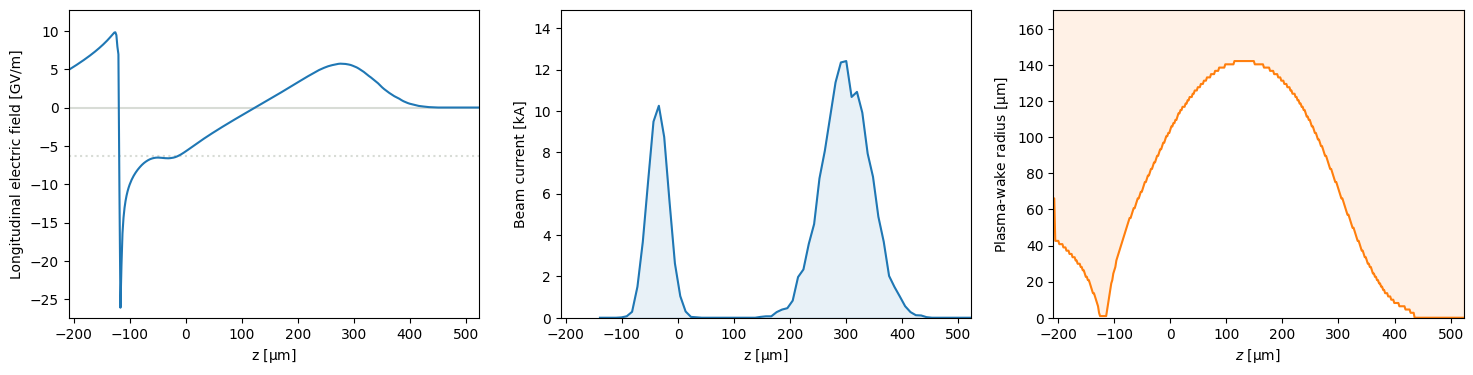

In [5]:
# plot the first-stage wakefield
linac.stages[0].plot_wakefield()

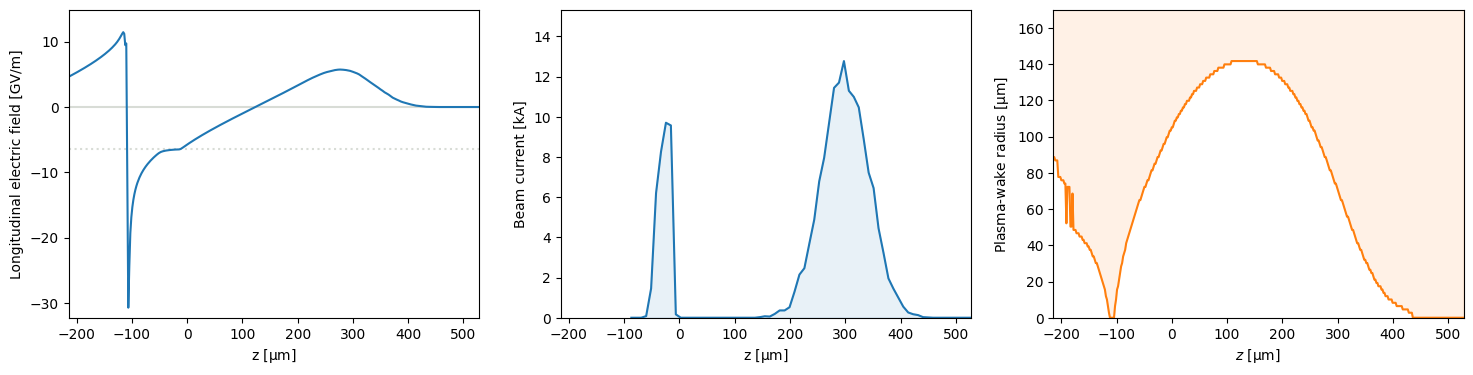

In [6]:
# plot the last-stage wakefield
linac.stages[-1].plot_wakefield()

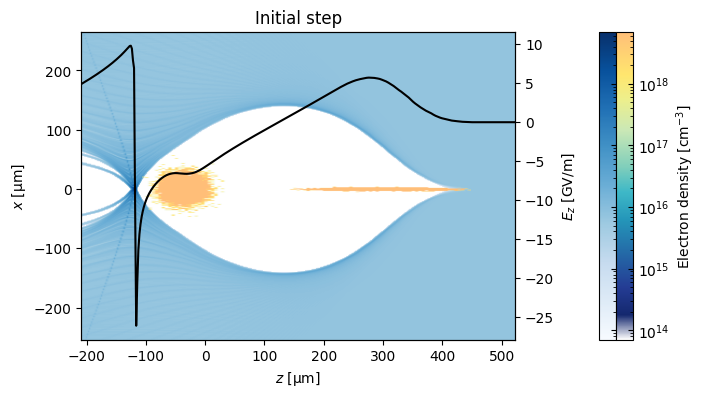

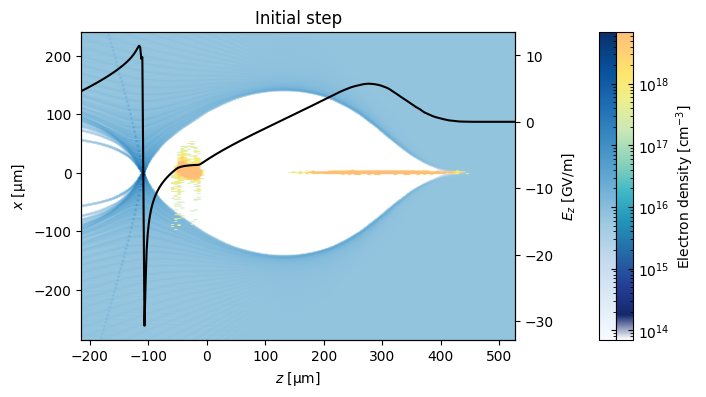

In [7]:
linac.stages[0].plot_wake()
plt.savefig(plot_path+'beams_wake_initial.png', format='png', dpi=300, bbox_inches='tight', transparent=False)
linac.stages[-1].plot_wake()
plt.savefig(plot_path+'beams_wake_final.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

### Plot beam evolution and survey

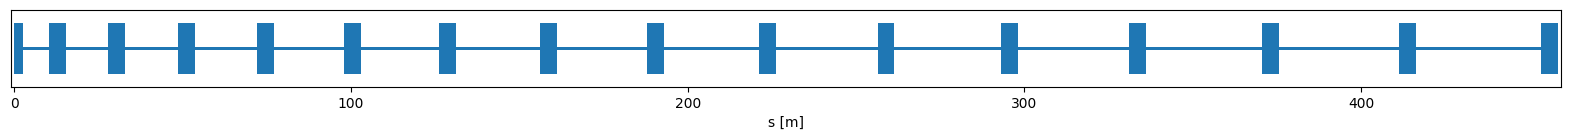

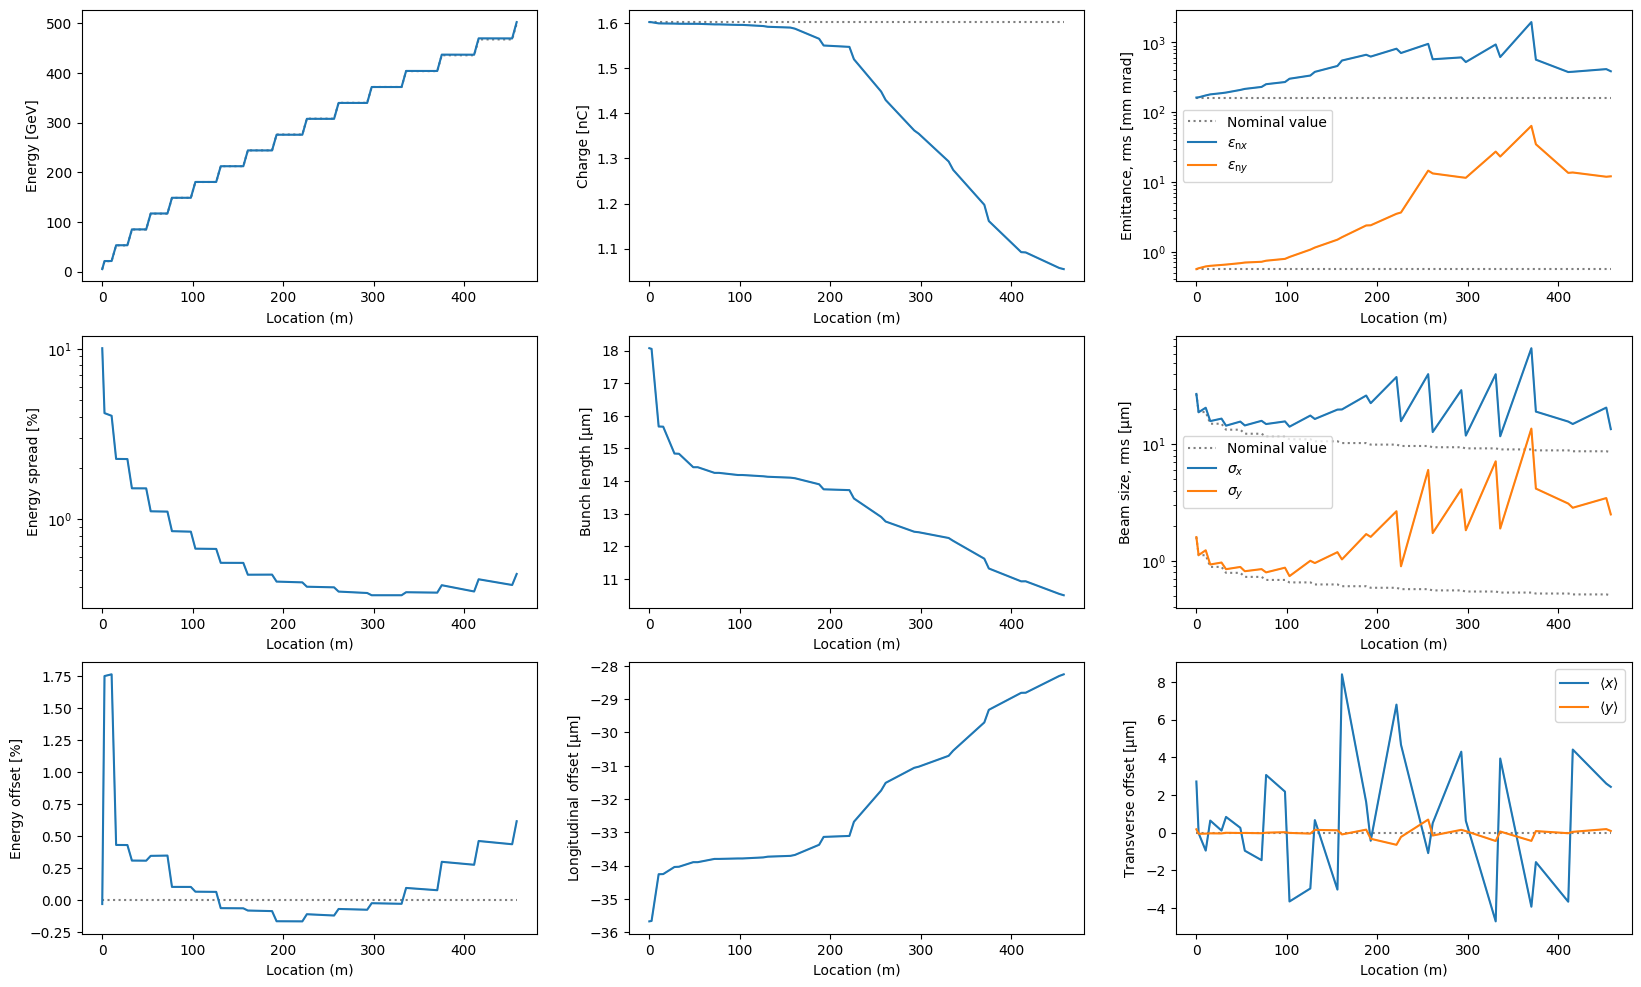

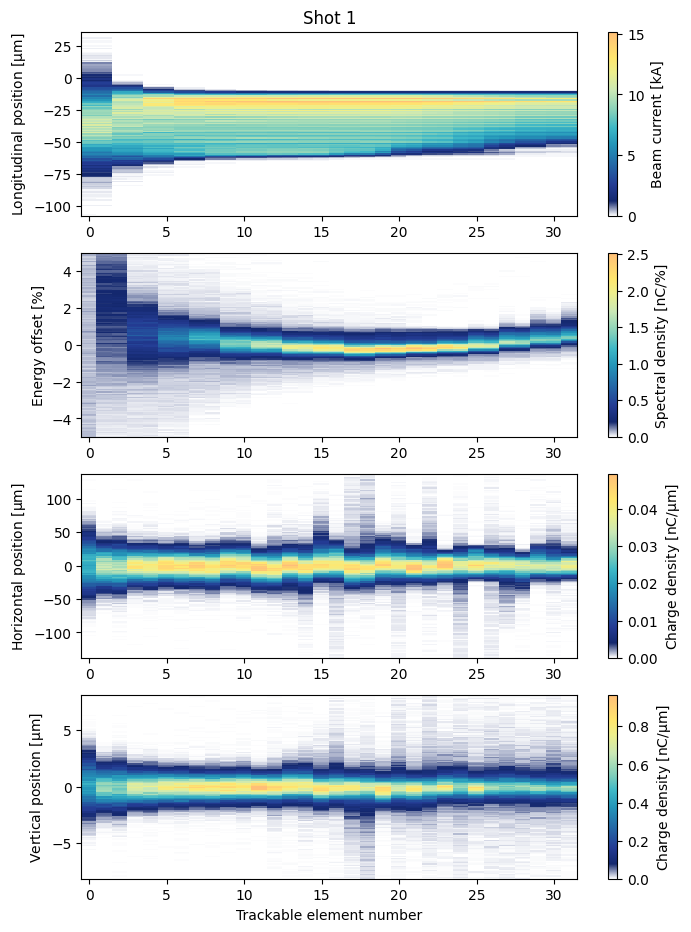

In [8]:
# plot linac survey
linac.plot_survey()

# plot beam evolution
linac.plot_evolution(use_stage_nums=False, save_fig=True)
linac[0].plot_waterfalls(save_fig=True)

In [9]:
linac.animate_sideview_x()
linac.animate_sideview_y()
linac.animate_phasespace_x()
linac.animate_phasespace_y()
linac.animate_lps()

'run_data/linac_example/plots/lps_shot0.gif'

![](run_data/linac_example/plots/lps_shot0.gif)

In [10]:
shot_num = 0
stage_num = 15
stage_tracked = linac[shot_num].stages[stage_num]  # Get a specific acceleration stage in a linac. Zero indexing.
beam_out = linac[shot_num].get_beam(stage_num*2+1)  # Get the corresponding beam after the acceleration stage. Zero indexing.

In [11]:
stage_tracked.print_current_summary(stage_tracked.drive_beam, linac.initial_beam, beam_out)

Time step [betatron wavelength/c]:		 0.050
Interstages enabled:				 False
Interstage dipole field:			 Not registered.
Ramp beta magnification:			 5.000
Radiation reaction enabled:			 False
Symmetrised drive beam:				 Not symmetrised.

Stage length [m]:				 5.000
Propagation length [m]:				 458.353
Drive beam to main beam efficiency [%]:		 25.697
Plasma density [m^-3]:				 7.000e+21
Drive beam x jitter (std) [um]:			 0.000
Drive beam y jitter (std) [um]:			 0.000
----------------------------------------------------------------------------

-------------------------------------------------------------------------------------
Quantity 					 Drive beam 		 Main beam
-------------------------------------------------------------------------------------
Initial number of macroparticles:		 10000			 10000
Current number of macroparticles:		  			 6583
Initial beam population:			 2.700e+10 		 1.000e+10
Current beam population:			 	 		 6.583e+09

Weighted main beam gradient [GV/m]:			  		 -6.590571